In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tooth-decay-datasetraw/teeth_dataset/test/no-caries/nc9.jpg
/kaggle/input/tooth-decay-datasetraw/teeth_dataset/test/no-caries/nc10.jpg
/kaggle/input/tooth-decay-datasetraw/teeth_dataset/test/no-caries/nc1.jpg
/kaggle/input/tooth-decay-datasetraw/teeth_dataset/test/no-caries/nc2.jpg
/kaggle/input/tooth-decay-datasetraw/teeth_dataset/test/caries/208.jpg
/kaggle/input/tooth-decay-datasetraw/teeth_dataset/test/caries/212.jpg
/kaggle/input/tooth-decay-datasetraw/teeth_dataset/test/caries/215.jpg
/kaggle/input/tooth-decay-datasetraw/teeth_dataset/test/caries/202.jpg
/kaggle/input/tooth-decay-datasetraw/teeth_dataset/test/caries/wc2.jpg
/kaggle/input/tooth-decay-datasetraw/teeth_dataset/test/caries/wc45.jpg
/kaggle/input/tooth-decay-datasetraw/teeth_dataset/test/caries/wc50.jpg
/kaggle/input/tooth-decay-datasetraw/teeth_dataset/test/caries/211.jpg
/kaggle/input/tooth-decay-datasetraw/teeth_dataset/test/caries/wc44.jpg
/kaggle/input/tooth-decay-datasetraw/teeth_dataset/test/carie

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2

In [3]:
x = []
y = []

image_size = 224

labels = ['caries','without_caries']

for i in labels:
    
    folderPath = os.path.join('/kaggle/input/tooth-decay-datasetraw/teeth_dataset/Trianing',i)

    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        x.append(img)
        if(i=='caries'):
            y.append(1)
        else:
            y.append(0)
        
labels = ['caries','no-caries']
for i in labels:
    folderPath = os.path.join('/kaggle/input/tooth-decay-datasetraw/teeth_dataset/test',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        x.append(img)
        if(i=='caries'):
            y.append(1)
        else:
            y.append(0)

x = np.array(x)
y = np.array(y)

In [4]:
len(x)

288

In [6]:
x[0]

array([[[155, 100, 179],
        [153, 100, 175],
        [150,  99, 168],
        ...,
        [219, 180, 212],
        [200, 161, 194],
        [189, 149, 184]],

       [[155,  99, 180],
        [153,  99, 176],
        [150,  98, 169],
        ...,
        [209, 170, 203],
        [207, 167, 201],
        [205, 165, 201]],

       [[148,  94, 176],
        [149,  95, 174],
        [151,  99, 172],
        ...,
        [204, 165, 197],
        [213, 173, 206],
        [218, 179, 212]],

       ...,

       [[141, 156, 170],
        [143, 157, 170],
        [146, 159, 172],
        ...,
        [164, 170, 189],
        [164, 170, 189],
        [164, 170, 189]],

       [[133, 153, 169],
        [135, 154, 169],
        [138, 156, 170],
        ...,
        [168, 173, 192],
        [168, 174, 193],
        [169, 174, 193]],

       [[132, 155, 171],
        [134, 156, 172],
        [136, 157, 174],
        ...,
        [172, 176, 195],
        [172, 177, 196],
        [173, 177, 196]]

In [7]:
y[0]

1

In [8]:
x.shape

(288, 224, 224, 3)

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.85)

In [10]:
y_test

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

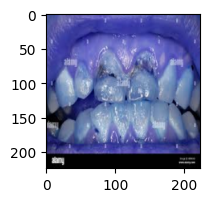

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15,2))
plt.imshow(x_train[1])

In [12]:
classes = ['no-cavity','cavity']

In [13]:
def plot_sample(x,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

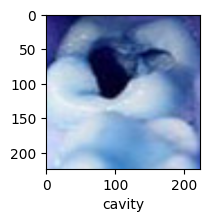

In [20]:
plot_sample(x_train,y_train,24)

In [21]:
y_train[35]

1

## Data Agumentation

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2024-05-23 05:55:27.904907: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-23 05:55:27.905054: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-23 05:55:28.051333: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [23]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=30,
      width_shift_range=0.3,
      height_shift_range=0.3,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

train_ds= train_datagen.flow(
        x_train, y_train, batch_size=32,
)

validation_ds = validation_datagen.flow(
        x_test, y_test, batch_size=32,)

In [24]:
len(train_ds)

8

In [25]:
len(validation_ds)

2

In [31]:
import keras
import tensorflow as tf
from tensorflow.keras import layers,models
from keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dropout

In [32]:
vgg_16 = VGG16(
    include_top=False,
    weights="imagenet",
    input_shape=(224,224,3),
    classifier_activation="sigmoid",
)

model1 = models.Sequential([
    
    ## vgg16 
    vgg_16,
    
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    layers.Dense(50, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model1.compile(optimizer= 'adam',
           loss='binary_crossentropy',
           metrics=['accuracy'])

In [ ]:
history1 = model1.fit(train_ds, validation_data=validation_ds, epochs=10)

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/8 ━━━━━━━━━━━━━━━━━━━━ 2:31 30s/step - accuracy: 0.8178 - loss: 0.6556

In [ ]:
model1

In [ ]:
plt.plot(history1.history['accuracy'], color='yellow', label='train_acc')
plt.plot(history1.history['val_accuracy'], color='red', label='validation_acc')
plt.plot(history1.history['loss'], color='green', label='train_loss')
plt.plot(history1.history['val_loss'], color='blue', label='validation_loss')
plt.legend()